In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
pd.set_option('display.max_columns', None)

### csv data preprocessing

In [2]:
data_df = pd.read_csv("data.csv")
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data_dropped = data_df.drop("Unnamed: 32",axis=1)
data_dropped = data_dropped.drop("id",axis=1)

In [4]:
features_mean= list(data_dropped.columns[1:11])
features_se= list(data_dropped.columns[11:20])
features_worst=list(data_dropped.columns[21:31])
data_dropped.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data_dropped.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


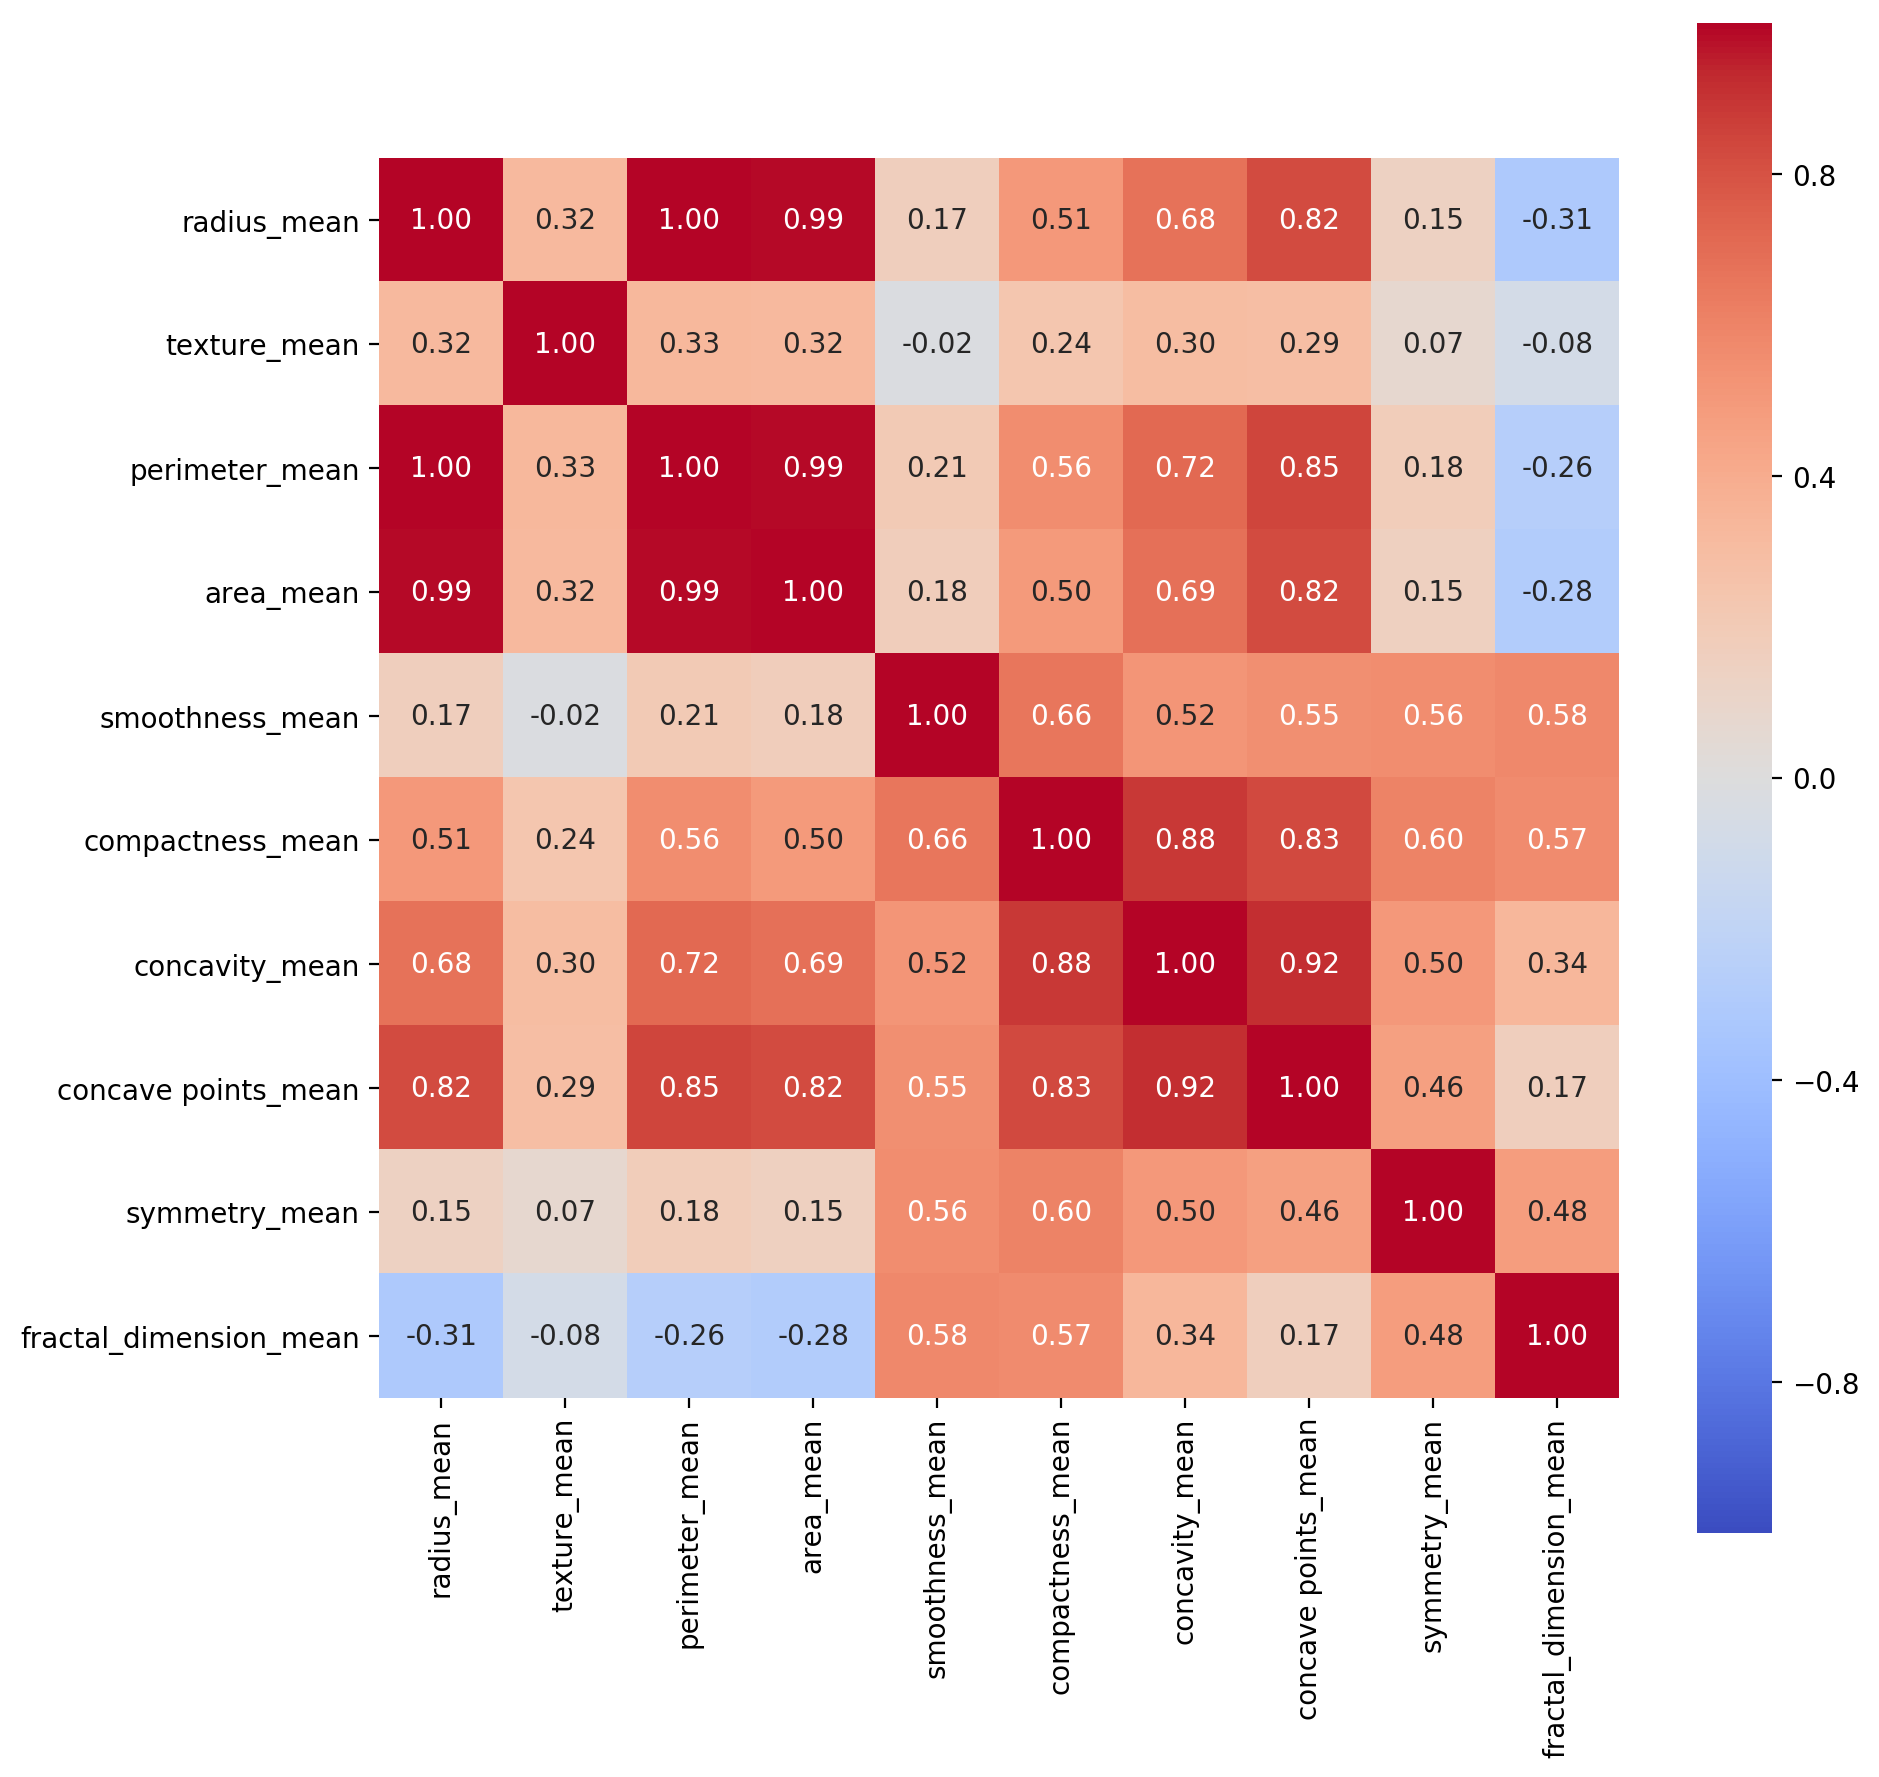

In [13]:
corr = data_dropped[features_mean].corr()
plt.figure(figsize=(10,10),dpi=200)
sns.heatmap(corr, vmin=-1, vmax=1, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

### sklearn data preprocessing

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [5]:
cancer.target[0]

0

In [6]:
sum(cancer.target==0)

212

In [7]:
data_m = cancer.data[cancer.target==0]
data_b = cancer.data[cancer.target==1]

In [8]:
X = cancer.data
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Data visualization

/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d13f28>,
      dtype=object)

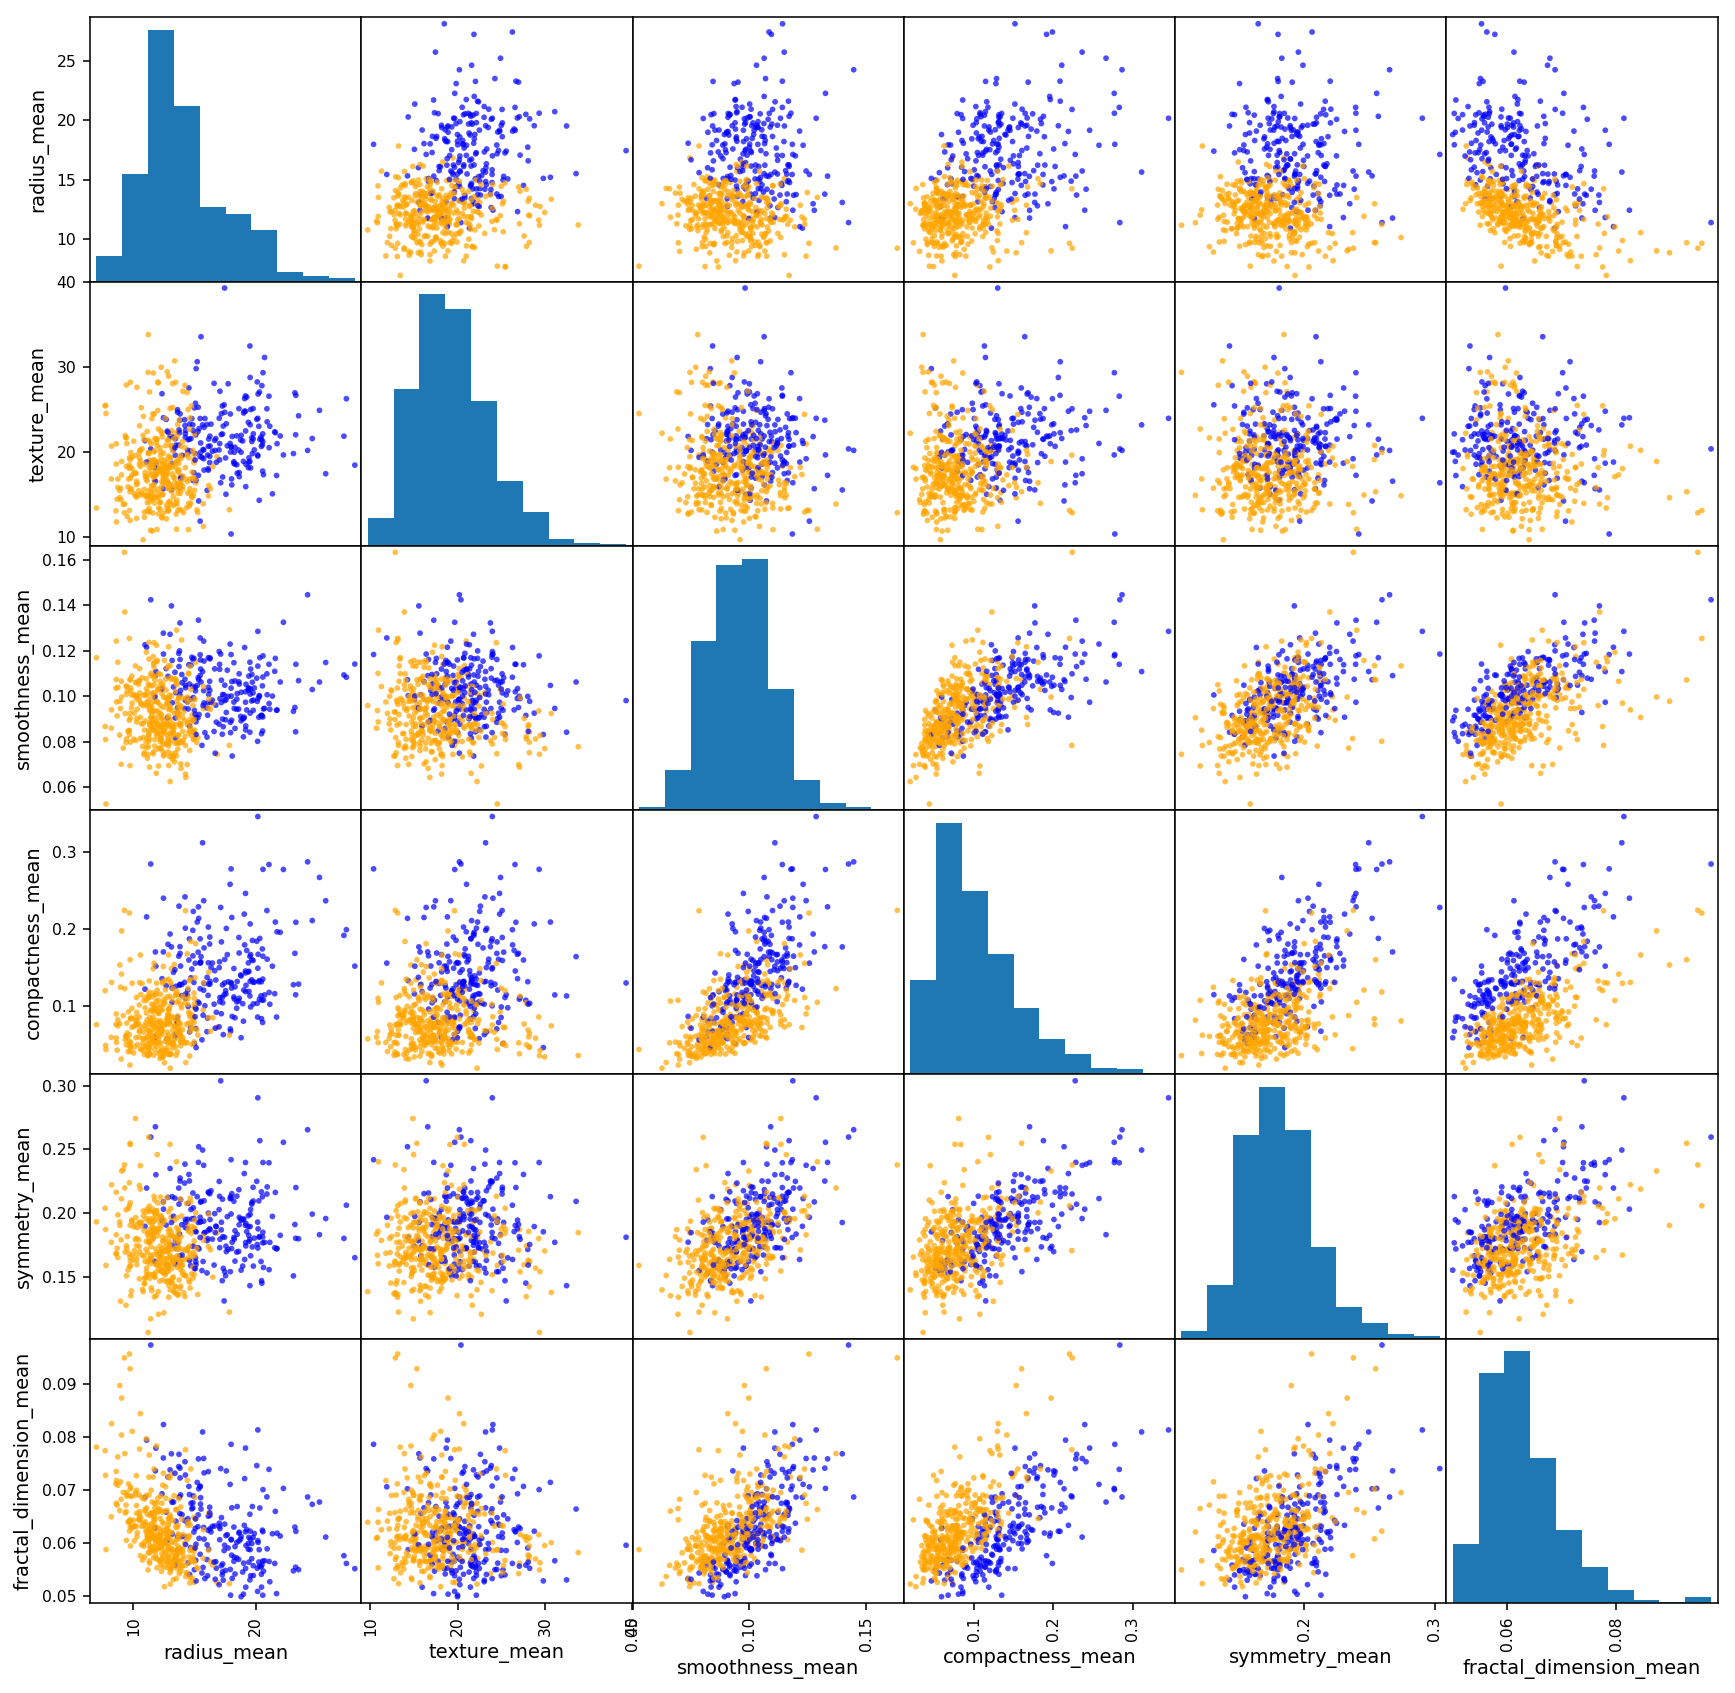

In [18]:
data_pairwise = data_dropped[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
color_function = {'M': "blue", 'B': "orange"}
colors = data_dropped["diagnosis"].map(lambda x: color_function.get(x))
plt.rcParams["figure.dpi"] = 140
pd.scatter_matrix(data_pairwise, c=colors, alpha=0.7, figsize=(15,15), s=35)

In [9]:
pca = PCA()
X_reduced = pca.fit_transform(X_std)
X_reduced.shape

(569, 30)

In [10]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Text(0.5, 0.9, 'First Three PCA Visualization')

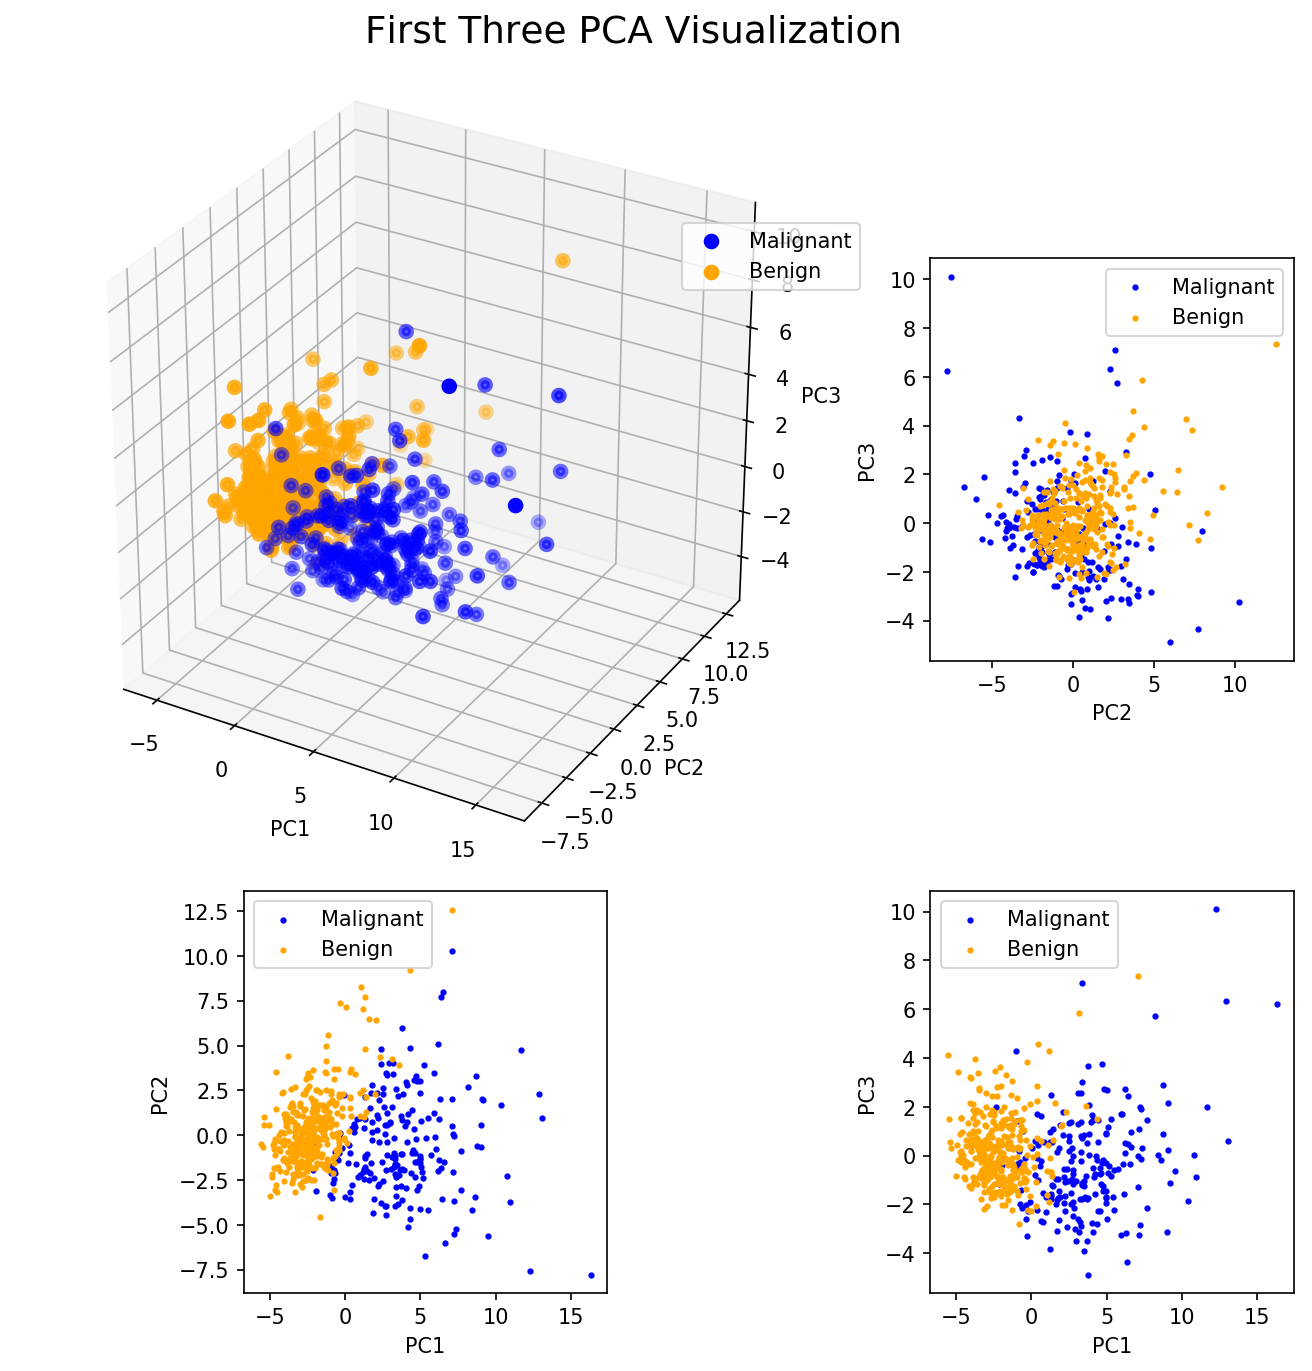

In [11]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,1], X_reduced[cancer.target==0][:,2], c='b', linewidths=3, label='Malignant')
ax1.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,1], X_reduced[cancer.target==1][:,2], c='orange', linewidths=3, label='Benign')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,1], c='b', s=4, label='Malignant')
ax2.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,1], c='orange', s=4, label='Benign')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_reduced[cancer.target==0][:,1], X_reduced[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax3.scatter(X_reduced[cancer.target==1][:,1], X_reduced[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax3.set_xlabel("PC2")
ax3.set_ylabel("PC3")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax4.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax4.set_xlabel("PC1")
ax4.set_ylabel("PC3")
ax4.legend()
fig.suptitle("First Three PCA Visualization", y=0.9, fontsize=18)

In [12]:
X_tsne2 = TSNE(n_components=2,random_state=0).fit_transform(X_std)

Text(0.5, 1.0, 'T-SNE Visualization')

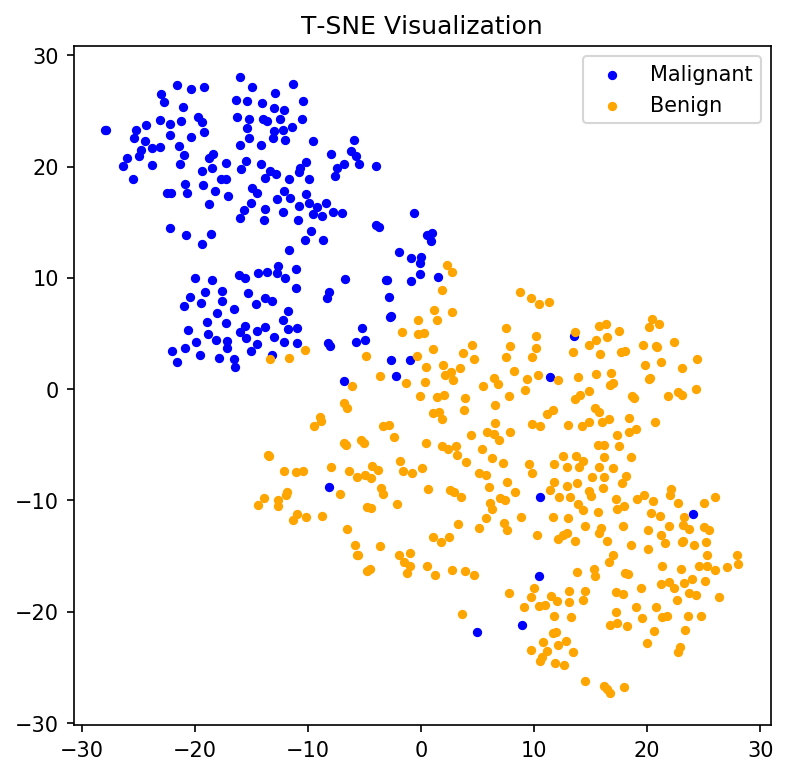

In [13]:
fig = plt.figure(dpi=150, figsize=(6,6))
plt.scatter(X_tsne2[cancer.target==0][:,0], X_tsne2[cancer.target==0][:,1], c='b', s=12, label='Malignant')
plt.scatter(X_tsne2[cancer.target==1][:,0], X_tsne2[cancer.target==1][:,1], c='orange', s=12, label='Benign')
plt.legend()
plt.title("T-SNE Visualization")

In [14]:
X_tsne = TSNE(n_components=3).fit_transform(X_std)
X_tsne.shape

(569, 3)

Text(0.5, 0.9, 'T-SNE Visualization')

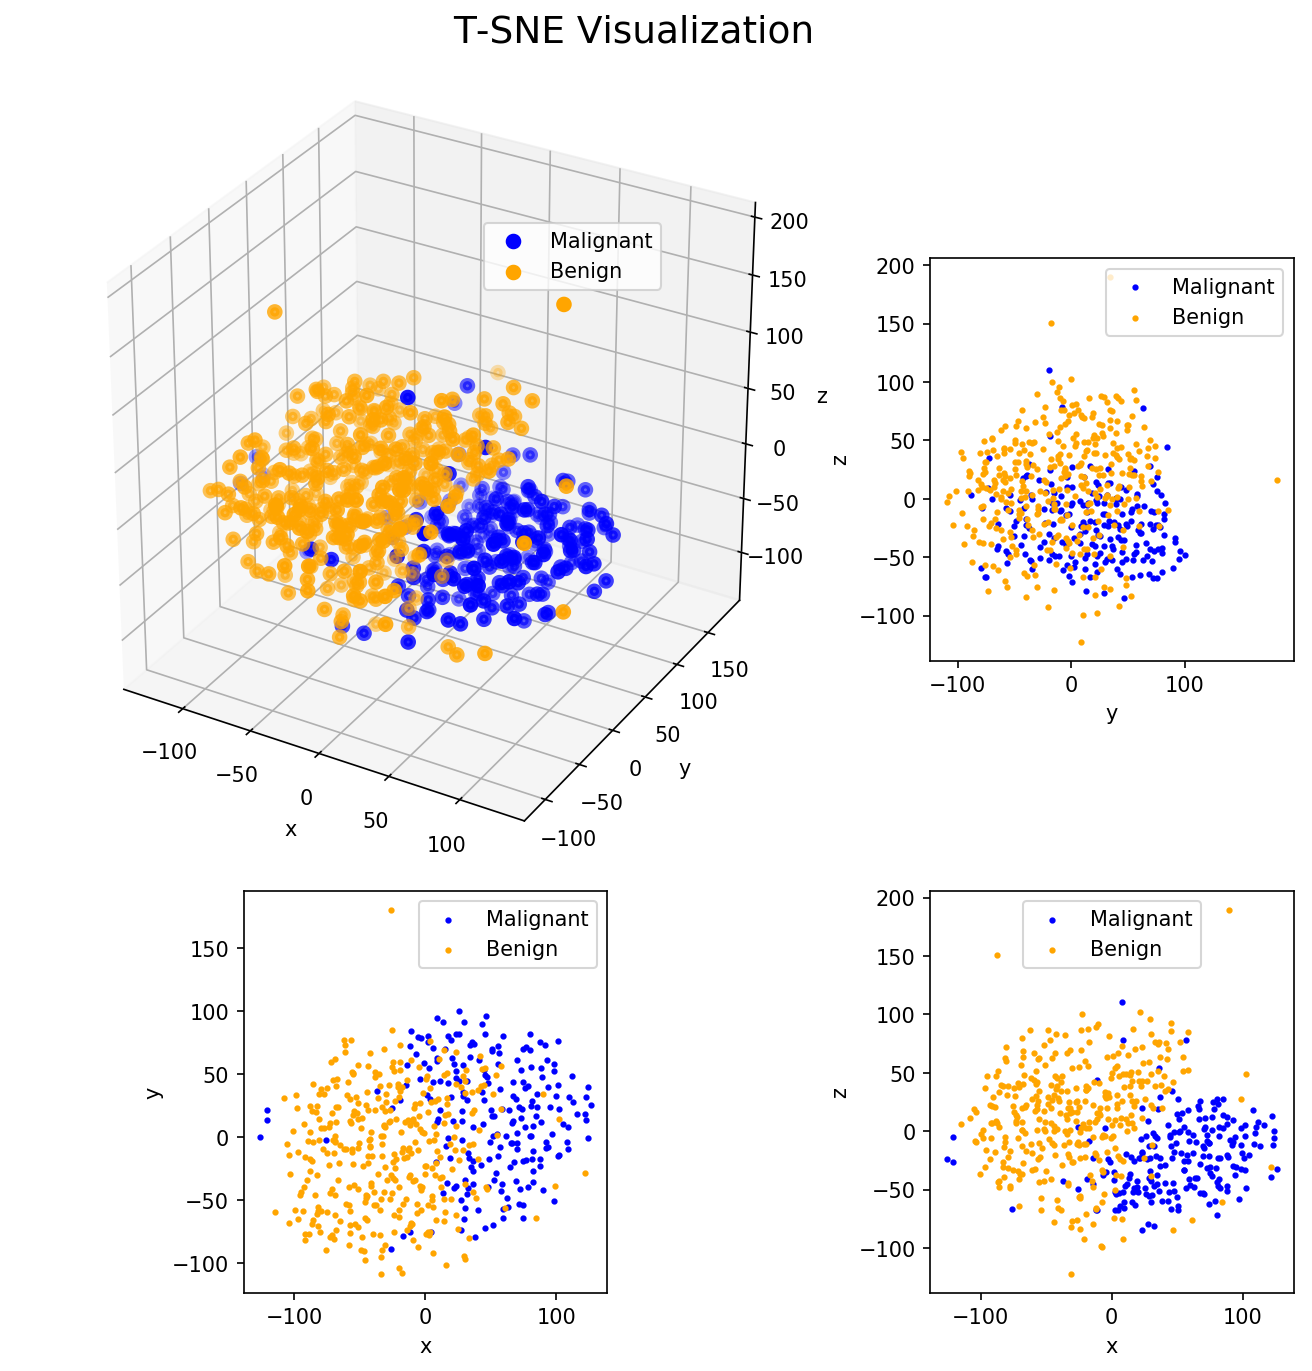

In [15]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,1], X_tsne[cancer.target==0][:,2], c='b', linewidths=3, label='Malignant')
ax1.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,1], X_tsne[cancer.target==1][:,2], c='orange', linewidths=3, label='Benign')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,1], c='b', s=4, label='Malignant')
ax2.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,1], c='orange', s=4, label='Benign')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_tsne[cancer.target==0][:,1], X_tsne[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax3.scatter(X_tsne[cancer.target==1][:,1], X_tsne[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax3.set_xlabel("y")
ax3.set_ylabel("z")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax4.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax4.set_xlabel("x")
ax4.set_ylabel("z")
ax4.legend()
fig.suptitle("T-SNE Visualization", y=0.9, fontsize=18)